In [59]:
import pandas as pd

In [60]:
data=pd.read_csv("/content/EUR_USD Historical Data (1).csv")
data

,Date,Price,Open,High,Low,Vol.,Change %
0,12/06/2023,1.0792,1.0793,1.0802,1.0772,NaN,-0.03%
1,12/05/2023,1.0795,1.0836,1.0848,1.0777,NaN,-0.38%
2,12/04/2023,1.0836,1.0887,1.0896,1.0804,NaN,-0.41%
3,12/01/2023,1.0881,1.0887,1.0913,1.0828,NaN,-0.05%
4,11/30/2023,1.0886,1.0971,1.0985,1.0878,NaN,-0.75%
...,...,...,...,...,...,...,...
2604,12/12/2013,1.3755,1.3787,1.3804,1.3736,NaN,-0.22%
2605,12/11/2013,1.3786,1.3760,1.3811,1.3739,NaN,0.18%
2606,12/10/2013,1.3761,1.3738,1.3797,1.3733,NaN,0.16%
2607,12/09/2013,1.3739,1.3720,1.3747,1.3694,NaN,0.24%


In [61]:
data.describe()

,Price,Open,High,Low,Vol.
count,2609.000000,2609.000000,2609.000000,2609.000000,0.0
mean,1.145460,1.145615,1.149908,1.141386,NaN
std,0.083548,0.083611,0.083155,0.083898,NaN
min,0.959200,0.959400,0.967100,0.953500,NaN
25%,1.091900,1.092200,1.096900,1.087700,NaN
50%,1.127400,1.127600,1.132200,1.122800,NaN
75%,1.181200,1.181200,1.184800,1.177200,NaN
max,1.393400,1.393300,1.399300,1.391000,NaN


In [62]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,12/06/2023,1.0792,1.0793,1.0802,1.0772,NaN,-0.03%
1,12/05/2023,1.0795,1.0836,1.0848,1.0777,NaN,-0.38%
2,12/04/2023,1.0836,1.0887,1.0896,1.0804,NaN,-0.41%
3,12/01/2023,1.0881,1.0887,1.0913,1.0828,NaN,-0.05%
4,11/30/2023,1.0886,1.0971,1.0985,1.0878,NaN,-0.75%


In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels

In [64]:
filtered_data=data.loc[:, ~data.columns.isin(['Open', 'High','Low','Vol.','Change %'])]
# data=filtered_data.reindex(index=filtered_data.index[::-1])
data=filtered_data.loc[::-1].reset_index(drop=True)
data
#filtered_data

,Date,Price
0,12/06/2013,1.3706
1,12/09/2013,1.3739
2,12/10/2013,1.3761
3,12/11/2013,1.3786
4,12/12/2013,1.3755
...,...,...
2604,11/30/2023,1.0886
2605,12/01/2023,1.0881
2606,12/04/2023,1.0836
2607,12/05/2023,1.0795


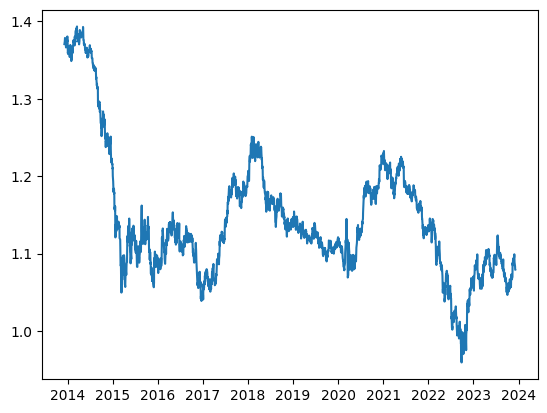

In [65]:
plt.plot(pd.to_datetime(filtered_data['Date']), filtered_data['Price'])


In [66]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(filtered_data["Price"].values)

print('p-value: %f' % result[1])

print("Should be under 0.05")

p-value: 0.904824
Should be under 0.05


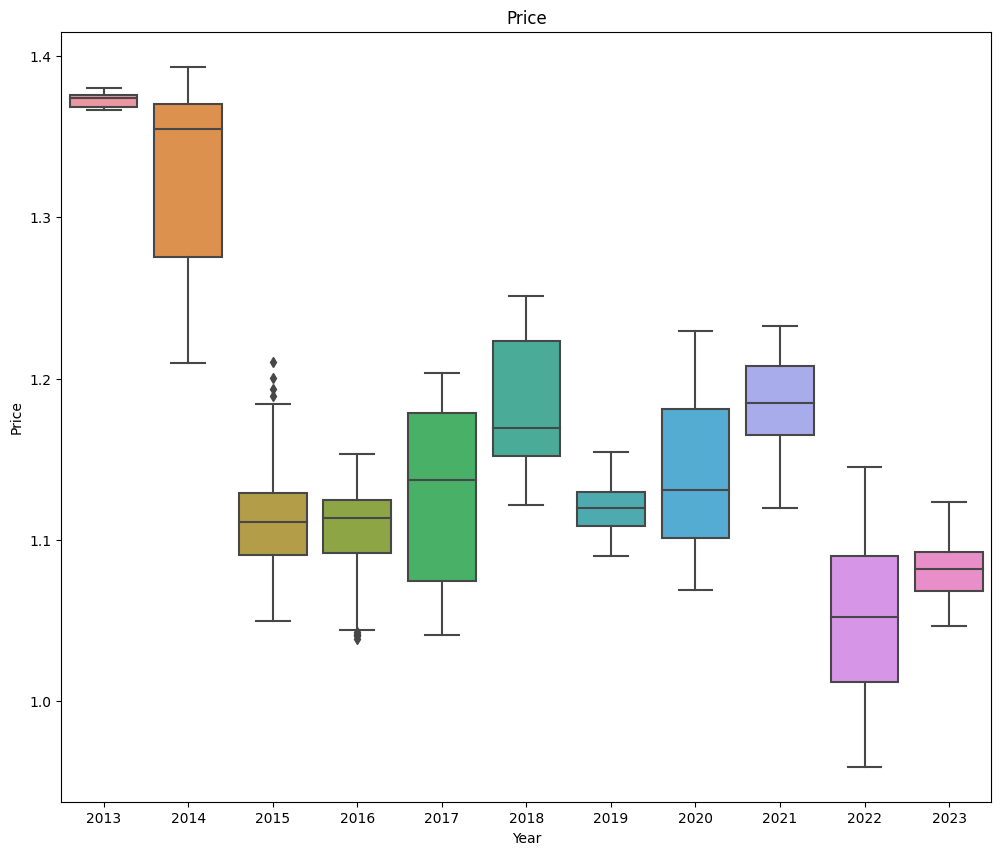

In [67]:
reindexed_df = filtered_data.copy()
reindexed_df.Date = reindexed_df.Date.astype('datetime64[ns]')
reindexed_df = reindexed_df.set_index('Date')

plt.close()
#It is sometimes good to make sure the canvas prior is rendered and plot is closed.

fig, ax = plt.subplots(figsize=(12,10))
sns.boxplot(x=reindexed_df.index.year, y=reindexed_df["Price"], ax=ax)#, width=20)
plt.title("Price")
plt.xlabel("Year")
plt.show()

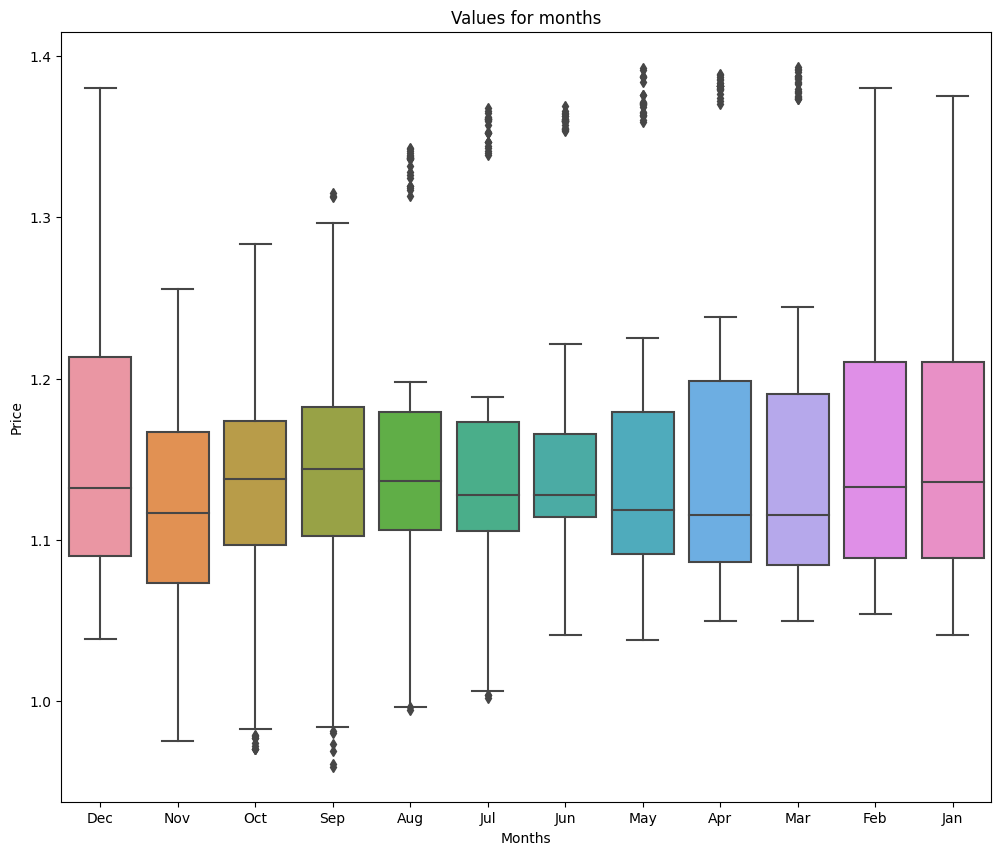

In [68]:
fig, ax = plt.subplots(figsize=(12,10))

sns.boxplot(x=reindexed_df.index.strftime("%b"), y=reindexed_df["Price"], ax=ax)#, width=20)
#to make it more readable, we use the month's name instead of month number, see:
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Period.strftime.html
plt.title("Values for months")
plt.xlabel("Months")
plt.show()

<Figure size 100x500 with 0 Axes>

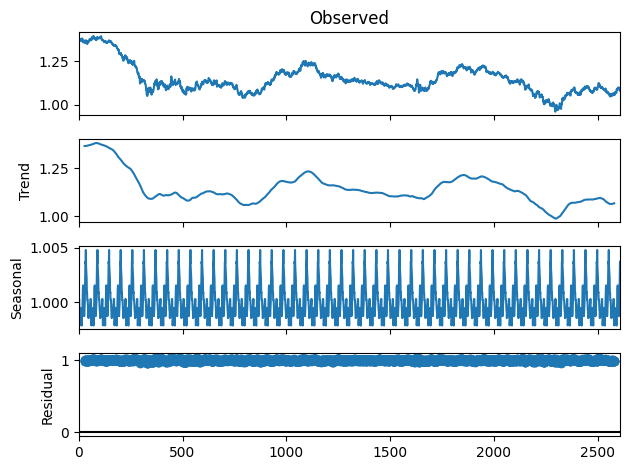

In [69]:
plt.close()
#from statsmodels.tsa.seasonal
from statsmodels.tsa.seasonal import seasonal_decompose
analysis = seasonal_decompose(data["Price"].values,model="multiplicative", period=56)
plt.figure(figsize=(1,5))
analysis.plot()
plt.show()

<Figure size 1000x600 with 0 Axes>

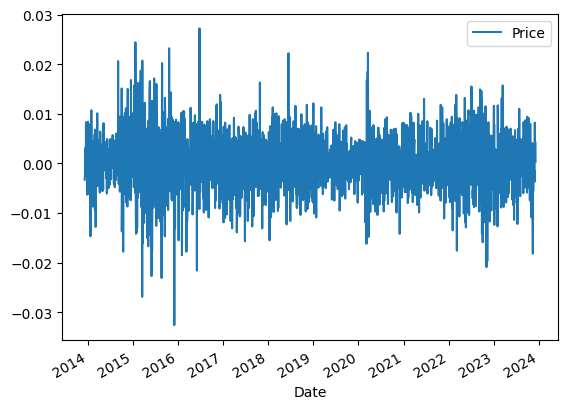

In [70]:
plt.figure(figsize=(10,6))
reindexed_df.diff(1).plot()
plt.show()

<Figure size 1000x2000 with 0 Axes>

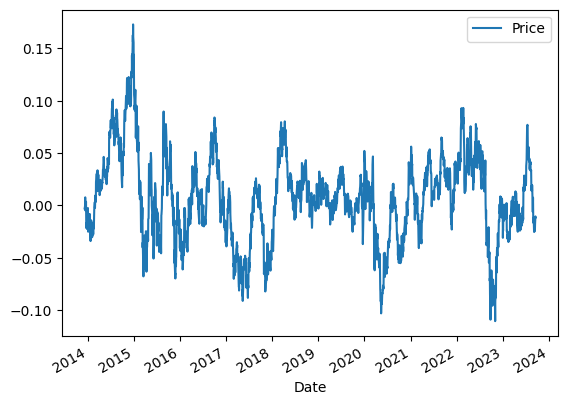

In [71]:
plt.figure(figsize=(10,20))
reindexed_df.diff(56).plot()
plt.show()

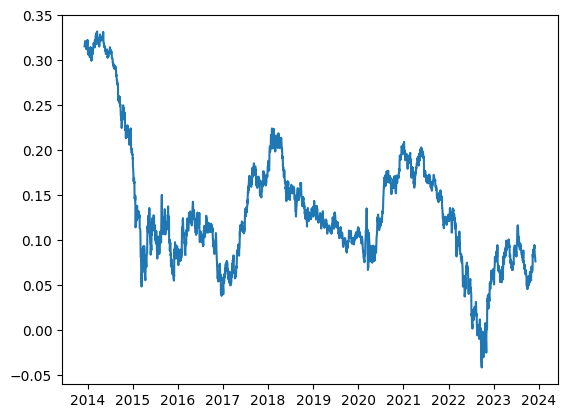

In [72]:
import numpy as np
plt.plot(reindexed_df.index.values,np.log(reindexed_df["Price"]))
plt.show()

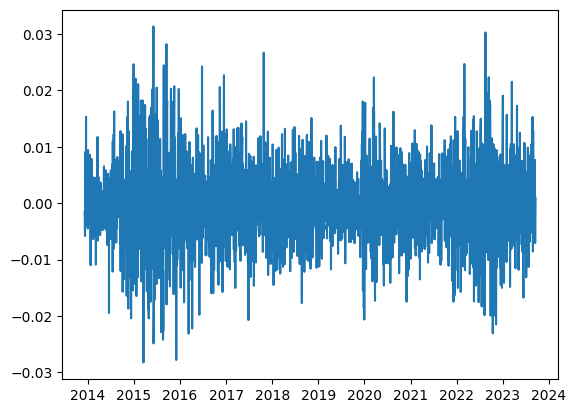

In [73]:
logs = pd.Series(np.log(reindexed_df["Price"])).diff(1).diff(56)
plt.plot(reindexed_df.index.values, logs)
plt.show()

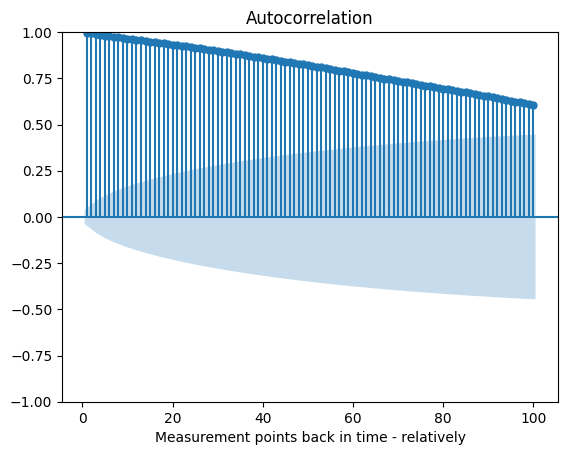

<Figure size 500x100 with 0 Axes>

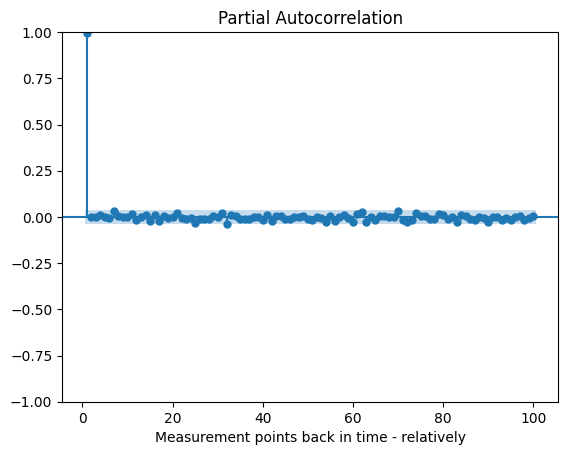

---


In [74]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plt.close()

plot_acf(filtered_data["Price"].values, lags=100, zero=False)
plt.xlabel("Measurement points back in time - relatively")
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(1)
plt.show()
plot_pacf(filtered_data["Price"].values, lags=100, zero=False)
plt.xlabel("Measurement points back in time - relatively")
plt.show()
print("---")

In [75]:
# !!! shuffle = False !!!
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.1, shuffle=False)

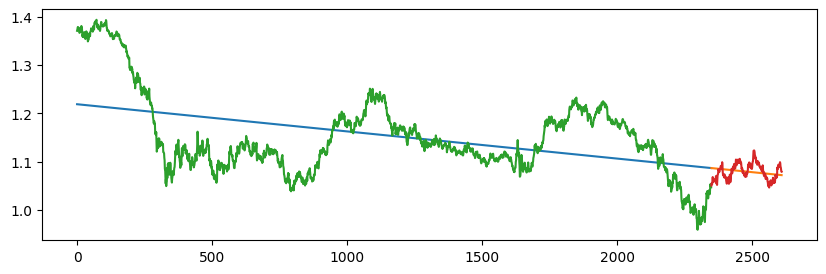

In [76]:
from sklearn import linear_model
lin_model= linear_model.LinearRegression()
lin_model.fit(train_data.index.astype("int64").values.reshape(-1, 1),train_data["Price"].values)#

train_fit = lin_model.predict(train_data.index.astype("int64").values.reshape(-1, 1))
train_fit = pd.Series(train_fit)
train_fit.index =train_data.index

prediction = lin_model.predict(test_data.index.astype("int64").values.reshape(-1, 1))
prediction = pd.Series(prediction)
prediction.index =test_data.index

plt.figure(figsize=(10,3))

plt.plot(train_fit)
plt.plot(prediction)

plt.plot(train_data["Price"])

plt.plot(test_data["Price"])

plt.show()

In [77]:
from statsmodels.tsa.api import ExponentialSmoothing


history = [x for x in list(train_data["Price"].values.astype("float"))]
predictions = list()

print("Prediction with ES method:\n")

# We iterate through the test set step by step
# Yes, test set. This can be undestood as an on-line learning scenario, for each datapoint
for t in range(len(list(test_data["Price"].values.astype("float")))):

    # Model inicialization
    model = ExponentialSmoothing(history,use_boxcox=True)

    # Worth noting,that with seasonality, trend and additivity parameters well chosen
    # - since Statsmodels is quite clever -
    # we could reach MUCH better results. This is only  anaive demonstration

    model_fit = model.fit()
    # Predicting one step ahead
    output = model_fit.forecast(1)
    # colecting predictions
    yhat = output[0]
    predictions.append(yhat)

    #doing one step in time
    obs = list(test_data["Price"].values.astype("float"))[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

Prediction with ES method:

predicted=1.046910, expected=1.050500
predicted=1.050483, expected=1.055600
predicted=1.055576, expected=1.053000
predicted=1.053012, expected=1.053500
predicted=1.053498, expected=1.063000
predicted=1.062955, expected=1.068200
predicted=1.068175, expected=1.062600
predicted=1.062626, expected=1.058200
predicted=1.058220, expected=1.060500
predicted=1.060489, expected=1.062100
predicted=1.062092, expected=1.060300
predicted=1.060308, expected=1.059300
predicted=1.059305, expected=1.061400
predicted=1.061390, expected=1.063500
predicted=1.063490, expected=1.063800
predicted=1.063799, expected=1.060800
predicted=1.060814, expected=1.066100
predicted=1.066075, expected=1.070200
predicted=1.070181, expected=1.066200
predicted=1.066218, expected=1.054600
predicted=1.054653, expected=1.059900
predicted=1.059875, expected=1.052000
predicted=1.052037, expected=1.064400
predicted=1.064339, expected=1.072800
predicted=1.072759, expected=1.073400
predicted=1.073397, ex


Mean abs error: 0.0038758661641374176
Explained variance: 0.9120846849741082


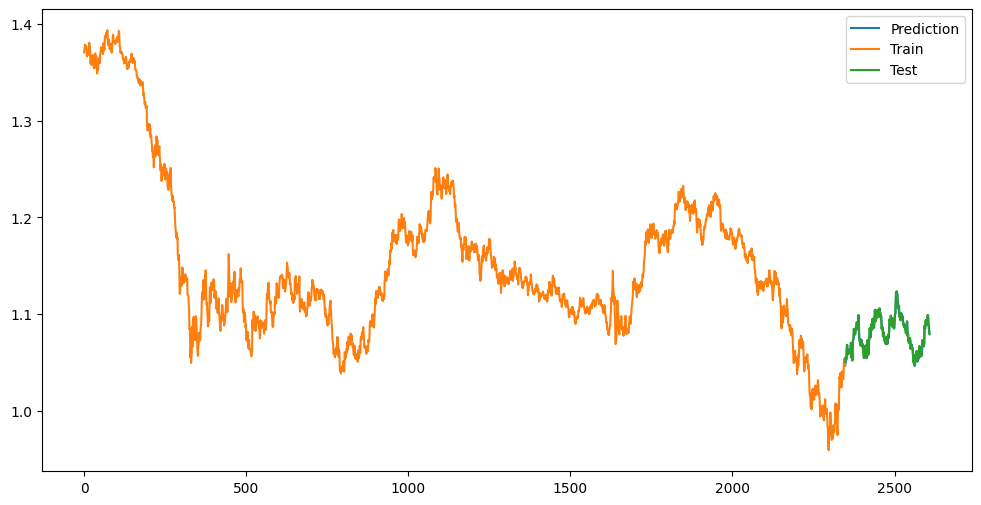

In [78]:
from sklearn.metrics import mean_absolute_error, explained_variance_score

errors = np.array(test_data["Price"].values)-np.array(predictions)

print()
print("Mean abs error:",mean_absolute_error(test_data["Price"].values,predictions))
print("Explained variance:",explained_variance_score(test_data["Price"].values,predictions))

predictions = pd.Series(predictions)
predictions.index =test_data.index

fig, ax = plt.subplots(figsize=(12,6))
plt.plot(predictions, label="Prediction")

plt.plot(train_data["Price"], label="Train")

plt.plot(test_data["Price"], label="Test")
plt.legend()
plt.show()

In [80]:
from statsmodels.tsa.arima.model import ARIMA
history = [x for x in list(train_data["Price"].values.astype("float"))]
predictions = list()

print("Predicting forward with ARIMA:\n")

# We iterate through the test set step by step
# Yes, test set. This can be undestood as an on-line learning scenario, for each datapoint
for t in range(len(list(test_data["Price"].values.astype("float")))):
    # Initialize model
    model = ARIMA(history, order=(5,1,0))
    # Do Scikit-like mode.fit(), no bullshit output on stdout, please!
    model_fit = model.fit()#disp=0)
    # Forecast one time period
    output = model_fit.forecast()
    # Collect it
    yhat = output[0]
    predictions.append(yhat)

    #Step one further in time
    obs = list(test_data["Price"].values.astype("float"))[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))


Predicting forward with ARIMA:



/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1.046897, expected=1.050500
predicted=1.050754, expected=1.055600


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1.055696, expected=1.053000
predicted=1.052898, expected=1.053500
predicted=1.053280, expected=1.063000
predicted=1.063041, expected=1.068200
predicted=1.068318, expected=1.062600
predicted=1.062380, expected=1.058200
predicted=1.058029, expected=1.060500
predicted=1.060746, expected=1.062100
predicted=1.062321, expected=1.060300


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1.060180, expected=1.059300
predicted=1.059177, expected=1.061400


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1.061461, expected=1.063500
predicted=1.063555, expected=1.063800
predicted=1.063727, expected=1.060800
predicted=1.060747, expected=1.066100


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1.066057, expected=1.070200
predicted=1.070325, expected=1.066200
predicted=1.066118, expected=1.054600


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1.054491, expected=1.059900
predicted=1.059982, expected=1.052000
predicted=1.052499, expected=1.064400
predicted=1.064005, expected=1.072800
predicted=1.072866, expected=1.073400
predicted=1.073187, expected=1.075500


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1.075088, expected=1.084600
predicted=1.084688, expected=1.082800
predicted=1.082939, expected=1.081600
predicted=1.081345, expected=1.078800
predicted=1.078881, expected=1.079200
predicted=1.079335, expected=1.082700
predicted=1.082731, expected=1.085500
predicted=1.085479, expected=1.086800
predicted=1.086670, expected=1.088500
predicted=1.088416, expected=1.091500
predicted=1.091496, expected=1.088900
predicted=1.088931, expected=1.086700
predicted=1.086628, expected=1.084400
predicted=1.084495, expected=1.086200
predicted=1.086276, expected=1.098900
predicted=1.098849, expected=1.091000
predicted=1.091080, expected=1.079300
predicted=1.078947, expected=1.073000
predicted=1.073225, expected=1.072300
predicted=1.072822, expected=1.070900
predicted=1.070996, expected=1.073600
predicted=1.073440, expected=1.067500
predicted=1.067507, expected=1.072000
predicted=1.071840, expected=1.073500
predicted=1.073674, expected=1.068900
predicted=1.068860, expected=1.066800
predicted=1.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1.060115, expected=1.059500
predicted=1.059626, expected=1.054600
predicted=1.054749, expected=1.060700


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1.060598, expected=1.057600


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1.057741, expected=1.066500
predicted=1.066220, expected=1.059600
predicted=1.059744, expected=1.063200
predicted=1.062928, expected=1.067800


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1.067943, expected=1.054700
predicted=1.054899, expected=1.054400
predicted=1.054079, expected=1.058000
predicted=1.058385, expected=1.064300
predicted=1.064358, expected=1.072900
predicted=1.072556, expected=1.073200
predicted=1.073044, expected=1.057500


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1.057400, expected=1.060500
predicted=1.060462, expected=1.066600
predicted=1.067172, expected=1.071900
predicted=1.071826, expected=1.076700
predicted=1.076218, expected=1.085500
predicted=1.085308, expected=1.083000
predicted=1.082973, expected=1.075900
predicted=1.075723, expected=1.079600
predicted=1.079658, expected=1.084300


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1.084627, expected=1.084300
predicted=1.084185, expected=1.090100
predicted=1.089794, expected=1.083900


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1.084004, expected=1.089500
predicted=1.089317, expected=1.095200
predicted=1.095337, expected=1.090300
predicted=1.090301, expected=1.092000
predicted=1.091679, expected=1.089700
predicted=1.089936, expected=1.085900
predicted=1.085986, expected=1.091000
predicted=1.090928, expected=1.098900


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1.098995, expected=1.104400
predicted=1.104203, expected=1.100000
predicted=1.099721, expected=1.092600
predicted=1.092515, expected=1.097100
predicted=1.097288, expected=1.095400
predicted=1.095761, expected=1.096700
predicted=1.096514, expected=1.098700
predicted=1.098599, expected=1.104100
predicted=1.104093, expected=1.097200
predicted=1.097175, expected=1.104000
predicted=1.103763, expected=1.102700
predicted=1.102945, expected=1.102000
predicted=1.101904, expected=1.097500
predicted=1.097455, expected=1.099900
predicted=1.099991, expected=1.105900


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1.105974, expected=1.101100


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1.101090, expected=1.101700
predicted=1.101423, expected=1.100400
predicted=1.100574, expected=1.096000
predicted=1.096132, expected=1.098000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1.097941, expected=1.091400
predicted=1.091623, expected=1.084800
predicted=1.084792, expected=1.087200


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1.087294, expected=1.086100
predicted=1.086379, expected=1.083900
predicted=1.083780, expected=1.076900
predicted=1.076885, expected=1.080200


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1.080265, expected=1.081100
predicted=1.081302, expected=1.076800
predicted=1.076738, expected=1.074800


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1.074667, expected=1.071900


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1.072104, expected=1.072400
predicted=1.072482, expected=1.070500
predicted=1.070547, expected=1.073300
predicted=1.073235, expected=1.068800
predicted=1.068860, expected=1.076100
predicted=1.075945, expected=1.070600
predicted=1.070775, expected=1.071200
predicted=1.071015, expected=1.069100
predicted=1.069201, expected=1.069700
predicted=1.069799, expected=1.078100
predicted=1.077985, expected=1.074700


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1.074755, expected=1.075700


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1.075386, expected=1.079100
predicted=1.079144, expected=1.083100
predicted=1.083180, expected=1.094500
predicted=1.094225, expected=1.093300
predicted=1.093224, expected=1.092200
predicted=1.091903, expected=1.091600


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1.091664, expected=1.098400
predicted=1.098566, expected=1.095600


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1.095647, expected=1.088900
predicted=1.088740, expected=1.090400
predicted=1.090427, expected=1.095900
predicted=1.096174, expected=1.091100
predicted=1.091082, expected=1.086400
predicted=1.086163, expected=1.091000
predicted=1.091106, expected=1.091100


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1.091342, expected=1.087700
predicted=1.087529, expected=1.085100
predicted=1.085040, expected=1.088700
predicted=1.088837, expected=1.096700


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1.096699, expected=1.099900
predicted=1.099704, expected=1.100600
predicted=1.100302, expected=1.112800


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1.112637, expected=1.122400
predicted=1.122442, expected=1.122700
predicted=1.122410, expected=1.123400


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1.123137, expected=1.122600
predicted=1.122807, expected=1.119800
predicted=1.119960, expected=1.112800
predicted=1.112883, expected=1.112300
predicted=1.112389, expected=1.106200
predicted=1.106436, expected=1.105300
predicted=1.105270, expected=1.108300
predicted=1.108340, expected=1.097300
predicted=1.097416, expected=1.101500
predicted=1.101263, expected=1.099300
predicted=1.099614, expected=1.098200


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1.098148, expected=1.093600


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1.093521, expected=1.094400
predicted=1.094482, expected=1.101000
predicted=1.101032, expected=1.100200


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1.100177, expected=1.095400
predicted=1.095184, expected=1.097300
predicted=1.097314, expected=1.097900
predicted=1.098137, expected=1.094400
predicted=1.094367, expected=1.090400
predicted=1.090340, expected=1.090400


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1.090523, expected=1.087400
predicted=1.087544, expected=1.087100
predicted=1.087041, expected=1.086500
predicted=1.086522, expected=1.089100
predicted=1.089082, expected=1.084400
predicted=1.084414, expected=1.085900
predicted=1.085804, expected=1.080900
predicted=1.081071, expected=1.080000
predicted=1.079998, expected=1.081700
predicted=1.081745, expected=1.087700
predicted=1.087692, expected=1.092400
predicted=1.092240, expected=1.084100
predicted=1.083999, expected=1.077300
predicted=1.077252, expected=1.079400
predicted=1.079718, expected=1.072000
predicted=1.072330, expected=1.072700
predicted=1.072498, expected=1.069900
predicted=1.070022, expected=1.069900
predicted=1.069910, expected=1.074800


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1.074712, expected=1.075200
predicted=1.075212, expected=1.072800
predicted=1.072641, expected=1.064100
predicted=1.064164, expected=1.065500
predicted=1.065631, expected=1.069000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1.069222, expected=1.067700
predicted=1.067633, expected=1.065900
predicted=1.065672, expected=1.065800
predicted=1.065862, expected=1.065200
predicted=1.065314, expected=1.059000
predicted=1.059036, expected=1.057000
predicted=1.057004, expected=1.050000
predicted=1.050230, expected=1.055900
predicted=1.055887, expected=1.057000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1.057088, expected=1.047600
predicted=1.047485, expected=1.046500
predicted=1.046363, expected=1.050300
predicted=1.050627, expected=1.054800
predicted=1.054798, expected=1.058600
predicted=1.058294, expected=1.056500


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1.056371, expected=1.060300
predicted=1.060231, expected=1.061700
predicted=1.061827, expected=1.052600
predicted=1.052639, expected=1.050900
predicted=1.050851, expected=1.055800


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1.056076, expected=1.057500
predicted=1.057542, expected=1.053500
predicted=1.053241, expected=1.057900
predicted=1.057798, expected=1.059300
predicted=1.059471, expected=1.066800
predicted=1.066633, expected=1.058800
predicted=1.058766, expected=1.056300
predicted=1.056201, expected=1.056000
predicted=1.056268, expected=1.056400
predicted=1.056581, expected=1.061300


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1.061123, expected=1.057600
predicted=1.057571, expected=1.056800
predicted=1.056670, expected=1.062000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1.062069, expected=1.072900
predicted=1.072894, expected=1.071500
predicted=1.071273, expected=1.069900
predicted=1.069601, expected=1.070700


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1.070850, expected=1.066600
predicted=1.066866, expected=1.068100
predicted=1.068047, expected=1.069700


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1.069772, expected=1.087900
predicted=1.087701, expected=1.084600
predicted=1.084476, expected=1.085000
predicted=1.084495, expected=1.090700
predicted=1.090798, expected=1.093800
predicted=1.094050, expected=1.090900
predicted=1.090705, expected=1.088700
predicted=1.088662, expected=1.090400
predicted=1.090575, expected=1.093900
predicted=1.093969, expected=1.095300


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1.095174, expected=1.099000
predicted=1.098832, expected=1.096800
predicted=1.096808, expected=1.088600
predicted=1.088636, expected=1.088100
predicted=1.088224, expected=1.083600
predicted=1.083931, expected=1.079500
predicted=1.079507, expected=1.079200


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Mean abs error: 0.0038821528783587085
Explained variance: 0.9119776609441084


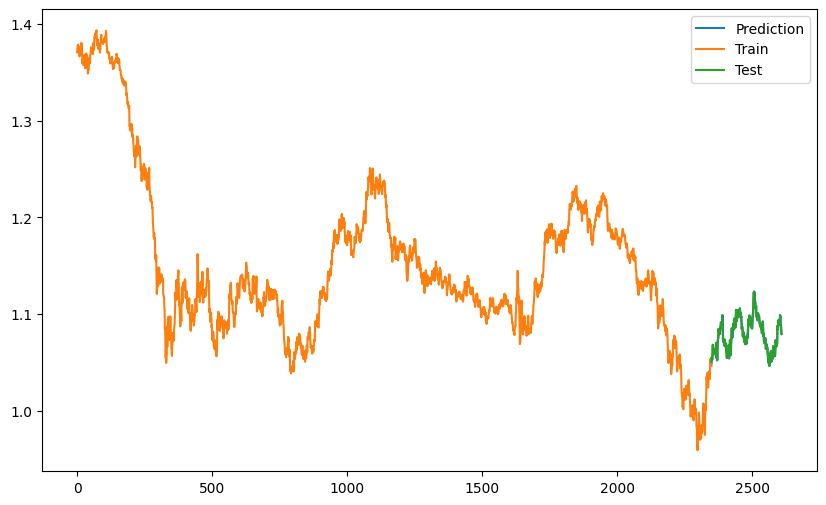

In [81]:
errors = np.array(test_data["Price"].values)-np.array(predictions)

print()
print("Mean abs error:",mean_absolute_error(test_data["Price"].values,predictions))
print("Explained variance:",explained_variance_score(test_data["Price"].values,predictions))

predictions = pd.Series(predictions)
predictions.index =test_data.index
plt.figure(figsize=(10,6))
plt.plot(predictions, label="Prediction")

plt.plot(train_data["Price"], label="Train")

plt.plot(test_data["Price"], label="Test")
plt.legend()
plt.show()

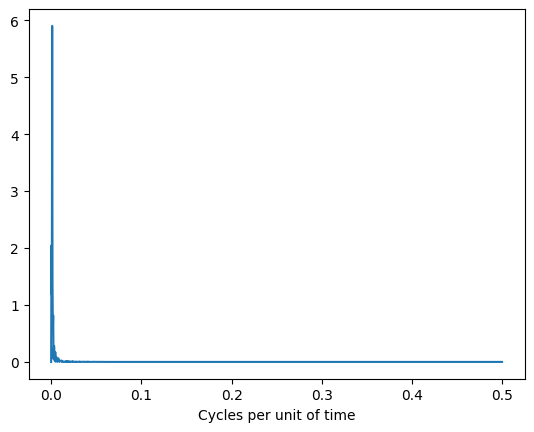

In [83]:
from scipy.signal import periodogram

freq, density = periodogram(reindexed_df["Price"], detrend='linear')
plt.plot(freq, density)
plt.xlabel("Cycles per unit of time")
plt.show()

In [84]:
data

,Date,Price
0,12/06/2013,1.3706
1,12/09/2013,1.3739
2,12/10/2013,1.3761
3,12/11/2013,1.3786
4,12/12/2013,1.3755
...,...,...
2604,11/30/2023,1.0886
2605,12/01/2023,1.0881
2606,12/04/2023,1.0836
2607,12/05/2023,1.0795


In [87]:
data=pd.read_csv("/content/EUR_USD Historical Data (1).csv")

In [94]:
price_col=data["Open"].values
price_return=np.log(price_col[1:]/price_col[:-1])
price_col=price_col[1:]
df=pd.DataFrame(columns=["price","return"], data=np.stack([price_col,price_return],axis=1))
df=df.loc[::-1].reset_index(drop=True)
print(df.head())


    price    return
0  1.3668 -0.003797
1  1.3720 -0.001311
2  1.3738 -0.001600
3  1.3760 -0.001960
4  1.3787  0.002324


In [95]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):n]

In [96]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
#test_df = (test_df - train_mean) / train_std
print("Normalised input data\n", train_df.head())

Normalised input data
       price    return
0  2.419640 -0.772635
1  2.480841 -0.275265
2  2.502026 -0.333085
3  2.527919 -0.405138
4  2.559696  0.451890


In [115]:
input_columns=[0]
target_columns=[0] # This is the price column
print("Input columns", list(train_df.columns[input_columns]))
print("Target columns", list(train_df.columns[target_columns]))

Input columns ['price']
Target columns ['price']


In [116]:
def generate_input_and_target_tensor(df, input_cols, target_col, time_sequence_length, warm_up_period, look_ahead):
    num_rows=len(df)
    data=np.array(df,np.float32)
    inputs=[]
    targets=[]
    for first_row in range(num_rows-time_sequence_length-look_ahead):
        inputs.append(data[first_row:first_row+time_sequence_length,input_cols])
        targets.append(data[first_row+look_ahead+warm_up_period:first_row+look_ahead+time_sequence_length,target_col])
    return np.stack(inputs), np.stack(targets)


time_sequence_length=40
warm_up_period=30
look_ahead=1
[inputs_tensor_train,targets_tensor_train]=generate_input_and_target_tensor(train_df, input_columns, target_columns, time_sequence_length, warm_up_period, look_ahead)
[inputs_tensor_val,targets_tensor_val]=generate_input_and_target_tensor(val_df, input_columns, target_columns, time_sequence_length, warm_up_period, look_ahead)
print("inputs",inputs_tensor_train.shape)
print("targets",targets_tensor_train.shape)

inputs (1784, 40, 1)
targets (1784, 10, 1)


In [117]:
#build model
inputs = keras.Input(shape=(time_sequence_length,len(input_columns)), name='input')
#hidden_vectors3d = layers.SimpleRNN(20, return_sequences=True,activation='tanh')(inputs)
hidden_vectors3d = layers.LSTM(20, return_sequences=True,activation='relu')(inputs)
if warm_up_period>0:
    # chop off the warm-up period
    hidden_vectors3d=hidden_vectors3d[:,warm_up_period:,:]
# surprisingly an ordinary Dense layer can act on a 3d tensor in the way we need here....
output_vectors3d=layers.Dense(len(target_columns))(hidden_vectors3d)
model = keras.Model(inputs=inputs, outputs=output_vectors3d)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 40, 1)]           0         
                                                                 
 lstm_2 (LSTM)               (None, 40, 20)            1760      
                                                                 
 tf.__operators__.getitem_2  (None, 10, 20)            0         
  (SlicingOpLambda)                                              
                                                                 
 dense_2 (Dense)             (None, 10, 1)             21        
                                                                 
Total params: 1781 (6.96 KB)
Trainable params: 1781 (6.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [118]:
model.compile(
    optimizer=keras.optimizers.Adam(0.01),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.MeanSquaredError(),
    # List of metrics to monitor
    metrics=[tf.metrics.MeanAbsoluteError()],
)

history = model.fit(
    inputs_tensor_train,
    targets_tensor_train,
    batch_size=100,
    epochs=10,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(inputs_tensor_val, targets_tensor_val),
)

Epoch 1/10
18/18 [==============================] - 3s 65ms/step - loss: 0.1834 - mean_absolute_error: 0.2319 - val_loss: 0.0135 - val_mean_absolute_error: 0.0882
Epoch 2/10
18/18 [==============================] - 1s 40ms/step - loss: 0.0111 - mean_absolute_error: 0.0797 - val_loss: 0.0099 - val_mean_absolute_error: 0.0747
Epoch 3/10
18/18 [==============================] - 1s 38ms/step - loss: 0.0079 - mean_absolute_error: 0.0676 - val_loss: 0.0058 - val_mean_absolute_error: 0.0586
Epoch 4/10
18/18 [==============================] - 1s 39ms/step - loss: 0.0069 - mean_absolute_error: 0.0627 - val_loss: 0.0050 - val_mean_absolute_error: 0.0541
Epoch 5/10
18/18 [==============================] - 1s 41ms/step - loss: 0.0097 - mean_absolute_error: 0.0749 - val_loss: 0.0249 - val_mean_absolute_error: 0.1064
Epoch 6/10
18/18 [==============================] - 1s 41ms/step - loss: 0.0092 - mean_absolute_error: 0.0720 - val_loss: 0.0119 - val_mean_absolute_error: 0.0820
Epoch 7/10
18/18 [====

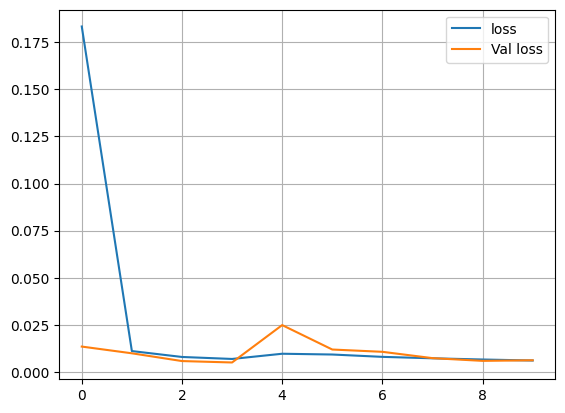

In [120]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"],label="Val loss")
plt.legend()
plt.grid()

In [125]:
train_std=np.array(train_std[target_columns])
train_mean=np.array(train_mean[target_columns])
print(train_mean)
print(train_std)

[1.16121195]
[0.08496637]


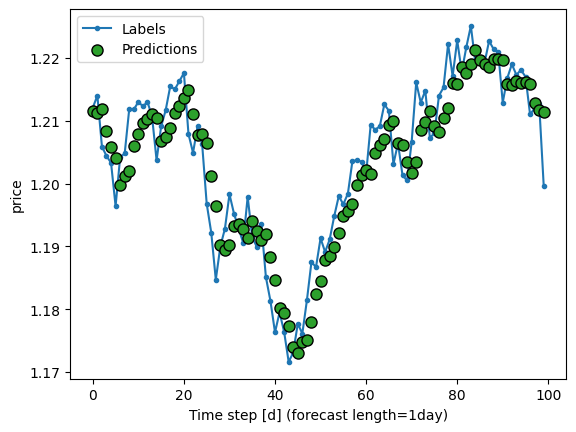

In [129]:
targets_=[]
predictions_=[]
for row in range(100):
    targets_.append(targets_tensor_val[row,-1,0]*train_std+train_mean) # here we are truncating the time series so tha only the final timestep is selected
    predictions_.append(model(inputs_tensor_val[row:row+1]).numpy()[0,-1,0]*train_std+train_mean)
plt.ylabel(train_df.columns[target_columns][0])
plt.plot(range(len(targets_)), targets_,label='Labels', marker='.', zorder=-10)
plt.scatter(range(len(predictions_)), predictions_,edgecolors='k', label='Predictions', c='#2ca02c', s=64)

plt.legend()
plt.xlabel('Time step [d] (forecast length='+str(look_ahead)+'day)')
plt.show()

In [137]:
targets_tensor_val

array([[[ 0.55655026],
        [ 0.5483117 ],
        [ 0.6059816 ],
        ...,
        [ 0.6448205 ],
        [ 0.5847967 ],
        [ 0.59892   ]],

       [[ 0.5483117 ],
        [ 0.6059816 ],
        [ 0.5812659 ],
        ...,
        [ 0.5847967 ],
        [ 0.59892   ],
        [ 0.62128174]],

       [[ 0.6059816 ],
        [ 0.5812659 ],
        [ 0.6495282 ],
        ...,
        [ 0.59892   ],
        [ 0.62128174],
        [ 0.52594995]],

       ...,

       [[-0.8993199 ],
        [-0.82281905],
        [-0.7910418 ],
        ...,
        [-0.7745647 ],
        [-0.72984105],
        [-0.7545567 ]],

       [[-0.82281905],
        [-0.7910418 ],
        [-0.8251729 ],
        ...,
        [-0.72984105],
        [-0.7545567 ],
        [-0.85341936]],

       [[-0.7910418 ],
        [-0.8251729 ],
        [-0.85224247],
        ...,
        [-0.7545567 ],
        [-0.85341936],
        [-0.85341936]]], dtype=float32)